In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import scipy.io as sio
import pandas as pd 
from scipy import signal
from scipy.ndimage.filters import gaussian_filter1d

from generate_data_files import read_out_arrays
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector
from ripple_detection.simulate import simulate_time


In [9]:
def perform_high_pass_filter(lfp, low_cut_frequency, high_cut_frequency, sf):
    wn = sf / 2.
    b, a = signal.butter(5, [low_cut_frequency/wn, high_cut_frequency/wn], 'bandpass')
    lfp = signal.filtfilt(b, a, lfp)
    return lfp


def compute_hilbert_envelope(lfp, ):
    analytic_signal = signal.hilbert(lfp)
    amplitude_envelope = np.abs(analytic_signal)
    return amplitude_envelope
    


In [10]:
data_path='../data/m4000series_LFP_ripple.mat'
data = sio.loadmat(data_path)
keys = [key for key in data.keys() if key.startswith("m")]

sf = 2.5e3

In [24]:
lfp, speed, ripple_index = read_out_arrays(data[keys[0]])

df = pd.DataFrame()
df['time'] = simulate_time(lfp.shape[0], sf)
df['lfp'] = lfp.flatten()
df['speed'] = speed




df['lfp_band'] = perform_high_pass_filter(df['lfp'], 150, 250, sf)
df['hilbert_envelope'] = compute_hilbert_envelope(df['lfp_band'])

ts = pd.Series(df['hilbert_envelope'])
mean = ts.rolling(window=2500, center=True, min_periods=1).mean()
std = ts.rolling(window=2500, center=True, min_periods=1).std()

<IPython.core.display.Javascript object>


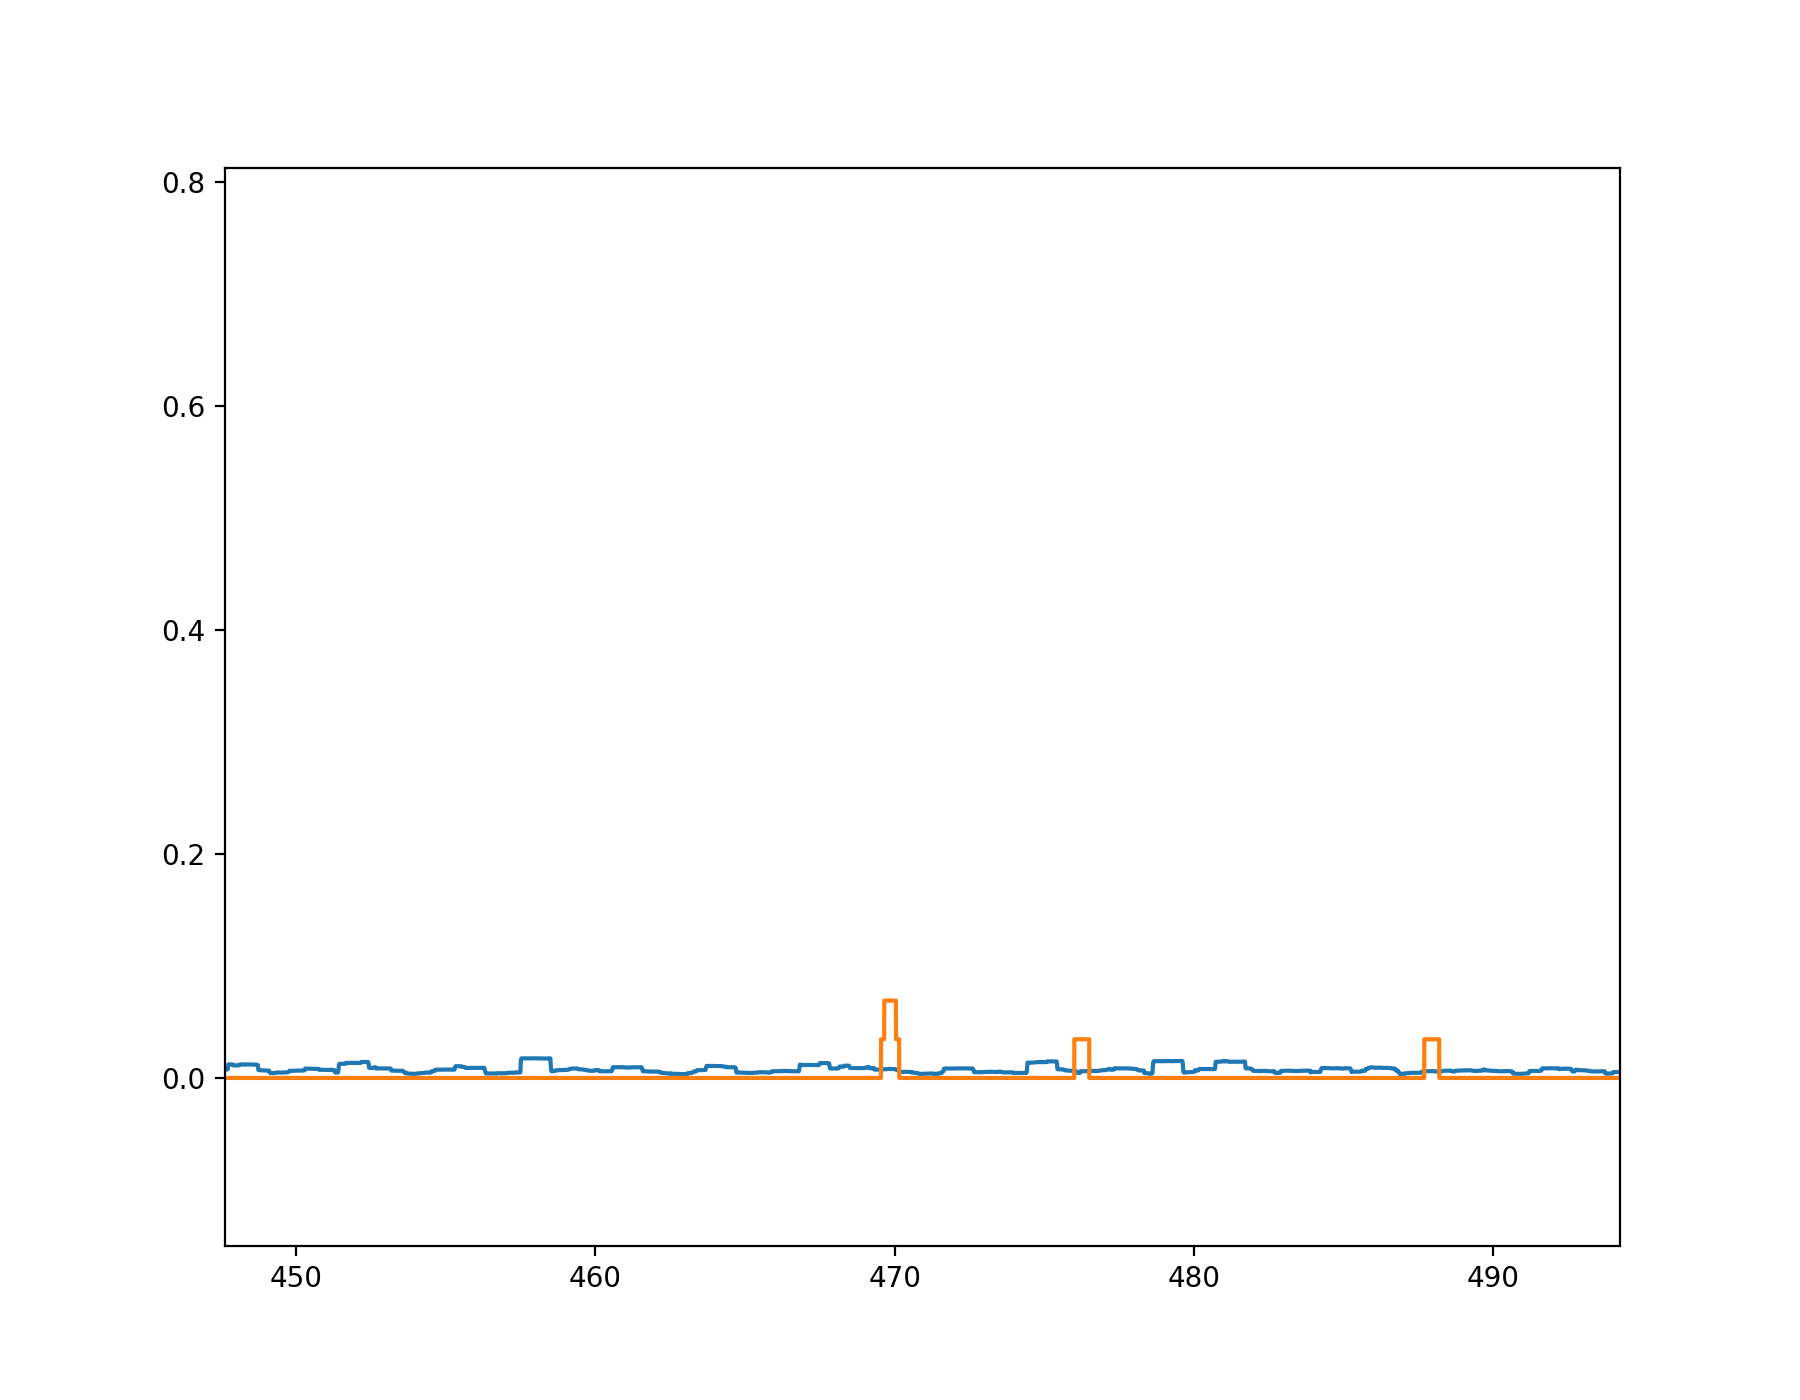

In [28]:
plt.figure(figsize=(9,7))
# plt.plot(df.time, df.lfp)
# plt.plot(df.time, df.lfp_band)
# plt.plot(df.time, df.hilbert_envelope)
# plt.plot(df.time, mean)
plt.plot(df.time, std)
plt.plot(df.time, df.speed)
plt.show()